# Linear Regression with `numpy`
- [Why numpy over python](https://stackoverflow.com/questions/993984/why-numpy-instead-of-python-lists) ?

# Introduction

Linear regression is a method used to find a relationship between a dependent variable and a set of independent variables. In its simplest form it consist of fitting a function y=w.x+b to observed data, where y is the dependent variable, x the independent, w the weight matrix and b the bias.

The following are some important terms to keep in mind.





In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

Before we can start working on our actual algorithms and models, we have to import our data in the correct format.

In [3]:
# Creating 100 samples of input (X) ranging from 1.0 to 10.0
# Size of each sample : 1*1
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]

# Creating 100 samples of output (X), each of size 1*1
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)

## Sanity Checks

So now that we've imported our data we can quickly check if the data has in fact been **loaded correctly.** 
A *simple* way to do that would be to print the shape of the data we've imported. 

So these simple checks to ensure that bigger errors don't pop up later are called *sanity checks*

In [4]:
print ("Output shape",data_y.shape)
print ("X's shape before adding bias:",data_x.shape)

# Adding bias to x
data_x = np.hstack((np.ones_like(data_x), data_x))
print ("X's shape after adding bias:",data_x.shape)

Output shape (100, 1)
X's shape before adding bias: (100, 1)
X's shape after adding bias: (100, 2)


## Training Data and Testing Data

When training an ML Model a best-practice is to split your available data into three sets. One for Training, one for Validation and another for Testing.

**Why?**

If a model trains on a set of data and learns it's patterns well enough then it will obviously perform well on the same set of data. Usually, the test set may not be known to the user. In order to evaluate the model, the validation set is used.

We should keep the sets mutually exclusive 

In [5]:
# Shuffling data
order = np.random.permutation(len(data_x))
portion = 20

# Splitting data into train and test 
# samples 0-19  : Test set
# samples 20-99 : Train set
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

print ("Training dataset shape")
print (train_x.shape)
print (train_y.shape)

print ("Test dataset shape")
print (test_x.shape)
print (test_y.shape)


Training dataset shape
(80, 2)
(80, 1)
Test dataset shape
(20, 2)
(20, 1)


# Loss Function
A loss function is a way to map the performance of our model into a real number. 
It measures how well the model is performing its task, be it a linear regression model fitting the data to a line, 
a neural network correctly classifying an image of a character, etc. 
The loss function is particularly important in learning since it is what guides the update of the parameters so 
that the model can perform better.

We use the Euclidean distance between predicted values and ground truth values as the error function.
L1-norm loss function is also known as least absolute deviations (LAD), least absolute errors (LAE). It is basically minimizing the sum of the absolute differences (S) between the target value (Yi) and the estimated values (f(xi)):

The predicted value for given sample shall be (`y_estimate`):
\begin{align*}
 h(x_i) = (w^Tx_i) + b
\label{eq:model_los}
\end{align*}

Error between predicted output and actual output:
\begin{align*}
  & L(y,h(x)) = \sum_{i=0}^n \big|y_i - h(x_i)\big|^2
\end{align*}
<br/>
This can be written as (`error`):
\begin{gather}
 L(y,x,w) = \dfrac{1}{n} \sum_{i=1}^{n} \big|\hat{y}_i- (w^Tx_i + b)\big|^2
\label{eq:model_loss}
\end{gather}
<br/>
On differentiating with respect to weight (`weight_gradient`)

\begin{gather}
\label{eq:dl_dw}
\dfrac{\partial\mathcal{L}(y,x,w)}{\partial w} = -\dfrac{1}{M} \sum_{i=1}^{M} 2x_i\big(\hat{y}_i - (w^Tx_i+b)\big)
\end{gather}
<br/>
On differentiating with respect to bias (`bias_gradient`)
\begin{gather}
\label{eq:dl_db}
\dfrac{\partial\mathcal{L}(y,x,w)}{\partial b} = -\dfrac{1}{M} \sum_{i=1}^{M} 2\big(\hat{y}_i - (w^Tx_i+b)\big)
\end{gather}

Where, M = No. of training examples.

In [6]:
def get_gradient(w, b, x, y):
    y_estimate = x.dot(w).flatten() + b
    
    # Error = expected_value - predicted_value    
    error_sqrt = (y.flatten() - y_estimate)
    error = error_sqrt**2
    
    # Note : Since error_sqrt and x are vectors, 
    # we can multiply the transpose of weight and X as matricess
    # This is equivalent to multiplying elements and summing them up
    weight_gradient = -(2.0/len(x)) * error_sqrt.dot(x)
    bias_gradient = -(2.0/len(x)) * np.sum(error_sqrt)
    
    return weight_gradient,bias_gradient, error

## Training and Convergence

All Machine Learning or Deep Learning models require training. Training is the phase in which your model/algorithm attempts to *learn* and *understand* the data that you've provided.

The **learning rate** is the rate at which your algorithm learns the data. We'll get into detail about this later but for now we can just say that the learning rate should neither be too high, or too small for good training.

**Convergence** occurs when you've *finished* training your data. Technically there's no way to define when training is done but in essence we define convergence to have occured when your weights don't change by some threshold value between two successive training iterations.

In statistics **hyperparameters** are parameters of a prior distribution. In our case it relates to the parameters of our model (the number of layers in a neural network, the number of neurons in each layer, the learning rate, regularization, etc.). The concept will become clear as we discuss some models.

## Gradient Descent
One of the methods we can use to minimize the error is Gradient Descent, which is based on using gradients to update the model parameters (w in our case) until a minimum is found and the gradient becomes zero. Convergence to the global minimum is guaranteed (with some reservations) for convex functions since that’s the only point where the gradient is zero. 

\begin{gather}
\label{eq:dl_dw}
\dfrac{\partial L(y,x,w)}{\partial w} = -\dfrac{1}{n} \sum_{i=1}^{n} x_i\\
\end{gather}

\begin{gather}
w = w - \alpha \dfrac{\partial L(y,x,w)}{\partial w}\\
\end{gather}

Here, alpha is the learning rate.

The algorithm works by evaluating the gradients and updating the parameters at each iteration until the gradient becomes zero.

In [7]:
# Initialising a random vector of weights
w = np.random.randn(2)
b = np.random.randn(1)

# Learning rate
alpha = 0.05

# Threshold to terminate learning
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
while True:
    weight_gradient,bias_gradient, error = get_gradient(w, b, train_x, train_y)
    new_w = w - alpha * weight_gradient
    new_b = b - alpha * bias_gradient
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 50 == 0:
        print ("Iteration: "+str(iterations)+" - Error: "+ str(np.sum(error)))
    iterations += 1
    w = new_w
    b = new_b

Iteration: 50 - Error: 446.00264588680056
Iteration: 100 - Error: 298.1696074319267
Iteration: 150 - Error: 215.857138751679
Iteration: 200 - Error: 170.02609468169265
Iteration: 250 - Error: 144.50766917188827
Iteration: 300 - Error: 130.29917679050027
Iteration: 350 - Error: 122.38798118501964
Iteration: 400 - Error: 117.98307922721864
Iteration: 450 - Error: 115.53045863414442
Iteration: 500 - Error: 114.16485553305422
Iteration: 550 - Error: 113.40449666019256
Iteration: 600 - Error: 112.98113381407865
Iteration: 650 - Error: 112.74540815101767
Iteration: 700 - Error: 112.61415764395119
Iteration: 750 - Error: 112.54107822026216
Iteration: 800 - Error: 112.5003880752404
Iteration: 850 - Error: 112.47773206868871
Iteration: 900 - Error: 112.46511735245709
Iteration: 950 - Error: 112.45809356098533
Iteration: 1000 - Error: 112.45418275984369
Iteration: 1050 - Error: 112.45200525135266
Iteration: 1100 - Error: 112.45079282887022
Iteration: 1150 - Error: 112.45011775996369
Iteration: 1

## Plotting predicted values against real values
- Orange straight line : Predicted Output
- Blue crooked line : Real Output

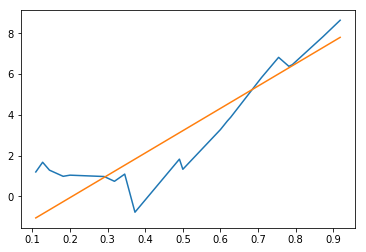

In [18]:
def predict(x):
    x = np.vstack((np.ones_like(x), x))
    return x.T.dot(w).flatten() + b

test_x = test_x[:,1]
# Sorting test array by X values, for easy plotting
# We had initially shuffled our dataset
arr1inds = test_x.argsort()
test_x = test_x[arr1inds[::-1]]
test_y = test_y[arr1inds[::-1]]

# Plotting real output
plt.plot(test_x,test_y)
# Plotting predicted output 
plt.plot(test_x,predict(test_x))
plt.show()